In [17]:
import pandas as pd
import numpy as np

In [30]:
df = pd.DataFrame({'X': ["17336 asjadl","3sdvo  abbc shb<s","4","6","8","9","11","14"], 'Y': [1,2,4,4,5,7,8,13]})
df

,X,Y
0,17336 asjadl,1
1,3sdvo abbc shb<s,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [31]:
string = " ".join(df["X"])
string

'17336 asjadl 3sdvo  abbc shb<s 4 6 8 9 11 14'

In [33]:
array1 = np.array([4, 5, 6, 7, 8, 9, 10, 11])


# Multiplicación elemento por elemento
resultado = df["Y"] * array1
print(resultado)

0      4
1     10
2     24
3     28
4     40
5     63
6     80
7    143
Name: Y, dtype: int64


In [2]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

df

,A,B,C
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,3.0,3
3,4.0,4.0,4
4,5.0,5.0,5


In [3]:
# Realizar imputaciones múltiples
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df)
imputed_data

array([[1.        , 1.00000035, 1.        ],
       [2.        , 2.        , 2.        ],
       [2.99999995, 3.        , 3.        ],
       [4.        , 4.        , 4.        ],
       [5.        , 5.        , 5.        ]])

In [4]:
# Crear un nuevo DataFrame con los valores imputados
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

# Mostrar los DataFrames antes y después de la imputación
print("DataFrame original:")
print(df)

print("\nDataFrame con imputaciones múltiples:")
print(df_imputed)

DataFrame original:
     A    B  C
0  1.0  NaN  1
1  2.0  2.0  2
2  NaN  3.0  3
3  4.0  4.0  4
4  5.0  5.0  5

DataFrame con imputaciones múltiples:
     A    B    C
0  1.0  1.0  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  4.0  4.0
4  5.0  5.0  5.0


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
data = {'ID': [1, 2, 3],
        'Text': ["Python is awesome", "Data science is exciting", "Word clouds are fun"]}

df = pd.DataFrame(data)
df

,ID,Text
0,1,Python is awesome
1,2,Data science is exciting
2,3,Word clouds are fun


In [21]:
text_data = " ".join(df['Text'])
text_data

'Python is awesome Data science is exciting Word clouds are fun'

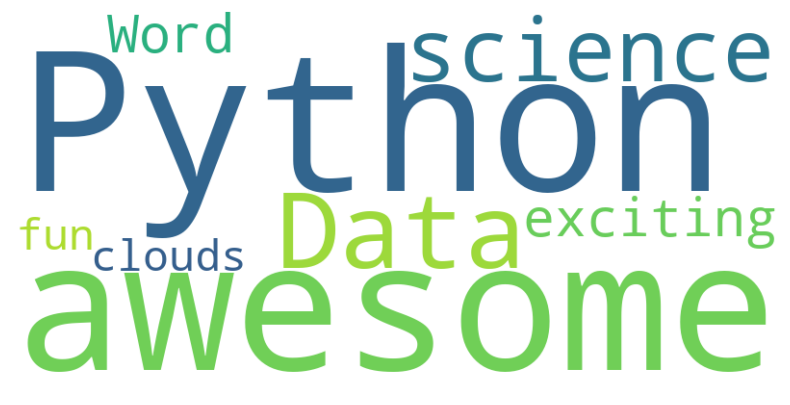

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

texto = "La tokenización es importante en NLP. ¿No crees?"
tokens_palabras = word_tokenize(texto)
tokens_frases = sent_tokenize(texto)

print("Tokens de palabras:", tokens_palabras)
print("Tokens de frases:", tokens_frases)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdcma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Tokens de palabras: ['La', 'tokenización', 'es', 'importante', 'en', 'NLP', '.', '¿No', 'crees', '?']
Tokens de frases: ['La tokenización es importante en NLP.', '¿No crees?']


In [13]:
import spacy

# Cargar el modelo preentrenado de spaCy para el español
nlp = spacy.load("es_core_news_sm")

# Texto de ejemplo
texto = "El reconocimiento de entidades con spaCy es fácil y preciso, sobre todo aquí en Barcelona, en el bar sonora."

# Procesar el texto
doc = nlp(texto)

# Imprimir entidades reconocidas
for entidad in doc.ents:
    print(entidad.text, entidad.label_)

spaCy LOC
Barcelona LOC


In [55]:
df = pd.read_csv("../data/total_df.csv", index_col="Unnamed: 0")
data_CAN = df[df["country_code"] == "CAN"]

# Package importing
import folium
import folium.plugins as fol_plugins

# set some values for undefined variables
coord_center_point = (51.5, 0.0)
zoom_level = 10
max_zoom = 18

# Instantiate folium base map to plot on
# I have changed this to use OpenStreetMap tiles (the default)
folium_map = folium.Map(location=coord_center_point,
                        zoom_start=zoom_level,
                        max_zoom=max_zoom,
                        attr='Mapbox')

## Add BRANCA colormap ##
import branca.colormap as branca_folium_cm

# these min and max values I inferred from your gradient dict
z_min = -1
z_max = 1

colormap = branca_folium_cm.linear.Blues_05.scale(z_min, z_max)
colormap.caption = "Bla bla"  # how do I change fontsize and color here?

folium_map.add_child(colormap);

# Prepare gradient dictionary according to the example like {0.4: ‘blue’, 0.65: ‘lime’, 1: ‘red’}
gradient_dict = {}

# Get the index values and colors from the just created branca-colormap
# NOTE: colors are RGBA-vectors, like "(0.9372549019607843, 0.9529411764705882, 1.0, 1.0)":
for ind_val, c in zip(colormap.index, colormap.colors):
    # Create gradient dictionary for heatmap on the fly
    c = r, g, b, a
    gradient_dict[ind_val] = f"rgba({r},{g},{b},{a})"

print(gradient_dict)

# make some data for display
import numpy as np # for random numbers
x = list(data_CAN['long'])
y = list(data_CAN['lat'])
z = list(data_CAN['sentiment'])

titlestr = 'this is my heatmap example'
min_alpha_opacity = 0.1
radius = 5
blur = 5

# Overlay the heatmap data on top of the previously instantiated folium basemap
fol_plugins.HeatMap(data=zip(y, x, z),
                    name=titlestr,
                    min_opacity=min_alpha_opacity,
                    max_zoom=max_zoom,
                    radius=radius,
                    gradient=gradient_dict,  # insert gradient dict
                    blur=blur).add_to(folium_map)

folium_map

{-1.0: 'rgba(0.03137254901960784,0.3176470588235294,0.611764705882353,1.0)', -0.5: 'rgba(0.03137254901960784,0.3176470588235294,0.611764705882353,1.0)', 0.0: 'rgba(0.03137254901960784,0.3176470588235294,0.611764705882353,1.0)', 0.5: 'rgba(0.03137254901960784,0.3176470588235294,0.611764705882353,1.0)', 1.0: 'rgba(0.03137254901960784,0.3176470588235294,0.611764705882353,1.0)'}


In [3]:
from folium import Map
from folium.plugins import HeatMap
from branca.colormap import LinearColormap

# Crear un mapa con una ubicación y nivel de zoom iniciales
map_heatmap = Map(location=[0, 0], zoom_start=2)

# Datos de ejemplo, asegúrate de reemplazar esto con tus datos reales
data = [(10, 20, -0.5), (30, -40, 0.8), (-15, 40, -0.2)]

# Obtener las coordenadas y valores de la variable cuantitativa
locations = [(lat, lon) for lat, lon, _ in data]
values = [value for _, _, value in data]

# Crear un colormap lineal con los valores mínimo y máximo de la variable
colormap = LinearColormap(['red', 'green'], vmin=min(values), vmax=max(values))

# Añadir el HeatMap al mapa con el gradiente de color
HeatMap(locations, gradient={0.0: 'black', 0.5: 'yellow', 1.0: 'green'}, radius=15).add_to(map_heatmap)

# Añadir la barra de colores al mapa
colormap.add_to(map_heatmap)

# Mostrar el mapa
map_heatmap


In [18]:
import pandas as pd
df = pd.read_csv("../data/total_df.csv", index_col="Unnamed: 0")

In [22]:
data = df.groupby("country_name").agg({"lat": "mean", "long":"mean"}).reset_index()

In [23]:
for i, row in data.iterrows():
    print(row['lat'])

AttributeError: 'function' object has no attribute 'iterrows'